In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Problem Statement

Given a adataset which captures the salary, Predict the salary of employees woorking in Baltimore.

In [ ]:
df = pd.read_csv('/content/sample_data/Baltimore_City_Employee_Salaries.csv')
df.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1.0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2.0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3.0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4.0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5.0


In [ ]:
df.tail()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
40600,Ricks,M,Helen,CROSSING GUARD,Transportation - Crossing Guards,C90,11961.0,11431.55,1999-03-18,FY2019,40601.0
40601,Ricks,D,Nelson,SOLID WASTE DRIVER,Public Works - Solid Waste (weekly),B70,38846.0,55717.56,2004-11-01,FY2019,40602.0
40602,Ricks,NaN,Russell,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,38433.0,49851.39,1985-12-02,FY2019,40603.0
40603,Ricks,M,Sheila,OFFICE ASSISTANT II,Enoch Pratt Free Library,A75,34701.0,34406.77,2009-06-29,FY2019,40604.0
40604,Ricks,C,Thomas,LABORER HOURLY,Public Works,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(40605, 11)

In [ ]:
df.info

<bound method DataFrame.info of       lastName middleInitial      firstName                       jobClass  \
0        Aaron             D         Kareem       UTILITIES INST REPAIR II   
1        Aaron             R          Lynda        ELECTION JUDGES REGULAR   
2        Aaron             G       Patricia  FACILITIES/OFFICE SERVICES II   
3       Abadir             O           Adam          OPERATIONS OFFICER II   
4        Abaku             O  Aigbolosimuan             POLICE OFFICER EID   
...        ...           ...            ...                            ...   
40600    Ricks             M          Helen                 CROSSING GUARD   
40601    Ricks             D         Nelson             SOLID WASTE DRIVER   
40602    Ricks           NaN        Russell       UTILITIES INST REPAIR II   
40603    Ricks             M         Sheila            OFFICE ASSISTANT II   
40604    Ricks             C         Thomas                 LABORER HOURLY   

                               

In [ ]:
df.describe()

,annualSalary,grossPay,ObjectId
count,40604.000000,40604.000000,40604.000000
mean,57196.989371,61302.875971,20302.500000
std,29663.056026,39541.801350,11721.509502
min,0.000000,6.230000,1.000000
25%,37417.000000,35874.475000,10151.750000
50%,54326.000000,58130.305000,20302.500000
75%,76385.250000,85379.845000,30453.250000
max,276375.000000,373111.190000,40604.000000


In [ ]:
df.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')

In [ ]:
# Checking for null values
df.isnull().sum()

lastName           16
middleInitial    9276
firstName           0
jobClass          184
agencyName          0
agencyID            1
annualSalary        1
grossPay            1
hireDate            3
fiscalYear          1
ObjectId            1
dtype: int64

In [ ]:
# Delete the column GrossPay
df = df.drop('grossPay', axis=1);

In [ ]:
df.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'hireDate', 'fiscalYear', 'ObjectId'],
      dtype='object')

In [ ]:
# Values_counts for AgencyId
df.agencyID.value_counts()

A99    8566
A64    4713
A50    4110
A65    2600
A49    1818
       ... 
A35      15
W07      12
A44      10
P83       9
U01       1
Name: agencyID, Length: 64, dtype: int64

In [ ]:
# hiredate - hireday, hiremonth, nireyear (int)

In [ ]:
df.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,hireDate,fiscalYear,ObjectId
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1.0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2.0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3.0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4.0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5.0


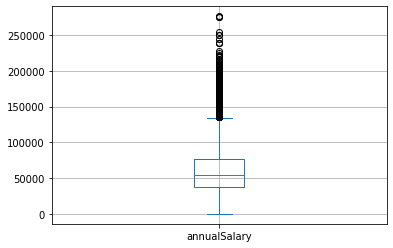

In [ ]:
# Plot a box plot for the annual salary column
df['annualSalary'].plot.box()
plt.grid()

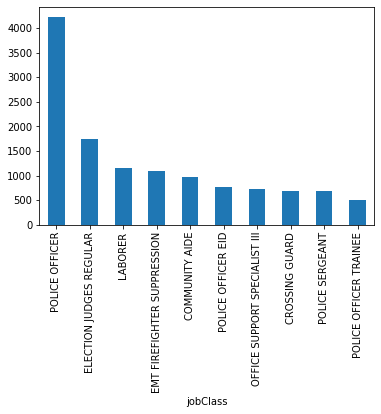

In [32]:
# plot top 10 jobs based on hiring
df.groupby(['jobClass'])['firstName'].count().sort_values(ascending=False).head(10).plot.bar();

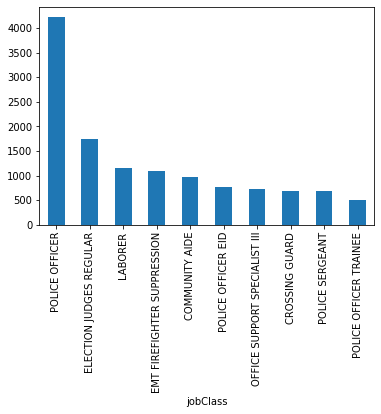

In [34]:
# Plot top 10 jobs with the highest salary
df.groupby(['jobClass'])['annualSalary'].count().sort_values(ascending=False).head(10).plot.bar();

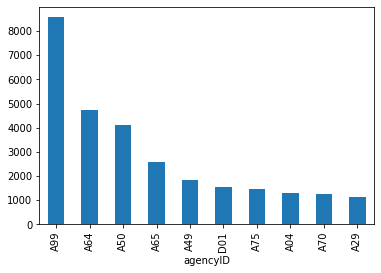

In [36]:
# Plot top 10 Agency's ID that highest number of employees
df.groupby(['agencyID'])['firstName'].count().sort_values(ascending=False).head(10).plot.bar();

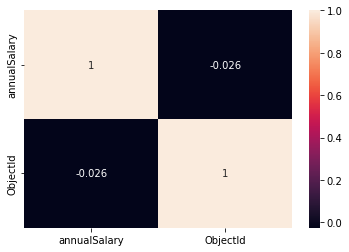

In [44]:
sns.heatmap(df.corr(), annot=True)